In [1]:
# Importando a biblioteca necessária para a manipulação dos dados
import pandas as pd

# URL do arquivo no site do IBGE 
url = "https://ftp.ibge.gov.br/Projecao_da_Populacao/Projecao_da_Populacao_2024/projecoes_2024_tab1_idade_simples.xlsx"

# Ler o arquivo direto da internet (primeira aba da planilha)
df = pd.read_excel(url, sheet_name=0)

# Visualiza as primeiras linhas
df.head()

,"Projeções das Populações, Revisão 2024",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 66,Unnamed: 67,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73,Unnamed: 74,Unnamed: 75
0,"Brasil, Grandes Regiões e Unidades da Federação",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,População por sexo e idade simples - 2000/2070,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,ANO,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,IDADE,SEXO,CÓD.,SIGLA,LOCAL,2000,2001.0,2002.0,2003.0,2004.0,...,2061.0,2062.0,2063.0,2064.0,2065.0,2066.0,2067.0,2068.0,2069.0,2070.0


In [2]:
# Pular as 5 primeiras linhas que não fazem parte da tabela
df = pd.read_excel(url, sheet_name=0, skiprows=5)

# Verificar o resultado
df.head()

,IDADE,SEXO,CÓD.,SIGLA,LOCAL,2000,2001,2002,2003,2004,...,2061,2062,2063,2064,2065,2066,2067,2068,2069,2070
0,0,Ambos,0,BR,Brasil,3423475,3347313,3274356,3212295,3163041,...,1615589,1597609,1580751,1564427,1549026,1534801,1521584,1509151,1497237,1485716
1,1,Ambos,0,BR,Brasil,3450022,3406966,3332612,3261091,3200484,...,1634395,1614666,1596716,1579885,1563579,1548205,1534002,1520805,1508394,1496496
2,2,Ambos,0,BR,Brasil,3461038,3444450,3401900,3327924,3256791,...,1655206,1633932,1614217,1596273,1579457,1563166,1547800,1533609,1520415,1508015
3,3,Ambos,0,BR,Brasil,3469109,3458052,3441638,3399284,3325501,...,1676639,1654738,1633474,1613776,1595841,1579039,1562761,1547399,1533216,1520035
4,4,Ambos,0,BR,Brasil,3477903,3466901,3455987,3439662,3397467,...,1697627,1676166,1654275,1633030,1613338,1595416,1578625,1562356,1547006,1532831


In [3]:
# Seleciona os anos (de 2000 , 2070)
anos = list(range(2000 ,2071))

# Aplicar o melt
df_populacao = df.melt(
    id_vars=df.columns[:5],  # As 5 primeiras colunas: idade, sexo e etc.
    value_vars=anos,         # Colunas de anos
    var_name="ANO",          # Nome da nova coluna de ano
    value_name="POPULACAO"   # Nome da nova coluna de valores
)

# Visualizando o resultado
df_populacao.head()

,IDADE,SEXO,CÓD.,SIGLA,LOCAL,ANO,POPULACAO
0,0,Ambos,0,BR,Brasil,2000,3423475
1,1,Ambos,0,BR,Brasil,2000,3450022
2,2,Ambos,0,BR,Brasil,2000,3461038
3,3,Ambos,0,BR,Brasil,2000,3469109
4,4,Ambos,0,BR,Brasil,2000,3477903


In [4]:
# Mostrar as ultimas 5 linhas do df
df_populacao.tail()

,IDADE,SEXO,CÓD.,SIGLA,LOCAL,ANO,POPULACAO
639634,86,Mulheres,53,DF,Distrito Federal,2070,15492
639635,87,Mulheres,53,DF,Distrito Federal,2070,14535
639636,88,Mulheres,53,DF,Distrito Federal,2070,13618
639637,89,Mulheres,53,DF,Distrito Federal,2070,12708
639638,90,Mulheres,53,DF,Distrito Federal,2070,66871


In [5]:
# 1. Análise inicial da base
df_populacao.info()
df_populacao.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 639639 entries, 0 to 639638
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   IDADE      639639 non-null  int64 
 1   SEXO       639639 non-null  object
 2   CÓD.       639639 non-null  int64 
 3   SIGLA      639639 non-null  object
 4   LOCAL      639639 non-null  object
 5   ANO        639639 non-null  object
 6   POPULACAO  639639 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 34.2+ MB


,IDADE,CÓD.,POPULACAO
count,639639.000000,639639.000000,6.396390e+05
mean,45.000000,24.272727,1.387347e+05
std,26.267872,15.476823,3.245092e+05
min,0.000000,0.000000,3.000000e+01
25%,22.000000,13.000000,1.579500e+04
50%,45.000000,24.000000,4.305900e+04
75%,68.000000,33.000000,1.154470e+05
max,90.000000,53.000000,5.504219e+06


 ## Análise descritiva
 A análise descritiva mostra que a base abrange idades de 0 a 90 anos, com média e mediana em 45 anos — evidenciando o envelhecimento da população. A maior parte da população se concentra entre 22 e 68 anos, indicando que adultos ainda predominam, embora os extremos estejam se expandindo.

 A coluna de população apresenta uma grande variação (desvio padrão elevado), sugerindo diferenças regionais e etárias expressivas — com alguns grupos populacionais muito mais representativos do que outros

In [6]:
# Criar a coluna FAIXA_ETARIA com base na idade
def classificar_faixa(idade):
    if idade <= 14:
        return 'Criança'
    elif idade <= 64:
        return 'Adulto'
    else:
        return 'Idoso'
    
df_populacao["FAIXA_ETARIA"] = df_populacao["IDADE"].apply(classificar_faixa)

# Verificar os dados
df_populacao[["IDADE","FAIXA_ETARIA"]].drop_duplicates().sort_values("IDADE").head(20) 

,IDADE,FAIXA_ETARIA
0,0,Criança
1,1,Criança
2,2,Criança
3,3,Criança
4,4,Criança
5,5,Criança
6,6,Criança
7,7,Criança
8,8,Criança
9,9,Criança


In [7]:
df_populacao.head()

,IDADE,SEXO,CÓD.,SIGLA,LOCAL,ANO,POPULACAO,FAIXA_ETARIA
0,0,Ambos,0,BR,Brasil,2000,3423475,Criança
1,1,Ambos,0,BR,Brasil,2000,3450022,Criança
2,2,Ambos,0,BR,Brasil,2000,3461038,Criança
3,3,Ambos,0,BR,Brasil,2000,3469109,Criança
4,4,Ambos,0,BR,Brasil,2000,3477903,Criança


🎯 Objetivo agora:
Agrupar os dados por ANO, FAIXA_ETARIA e SEXO

Somar a população para cada grupo

Ter uma base limpa para os gráficos e cálculos

In [8]:
# Agrupa por ano, faixa etária e sexo e soma a população
df_agrupado = df_populacao.groupby(["ANO", "FAIXA_ETARIA", "SEXO"])["POPULACAO"].sum().reset_index()

# Visualiza os primeiros dados
df_agrupado.head(10)


,ANO,FAIXA_ETARIA,SEXO,POPULACAO
0,2000,Adulto,Ambos,335726091
1,2000,Adulto,Homens,164481171
2,2000,Adulto,Mulheres,171244920
3,2000,Criança,Ambos,156779745
4,2000,Criança,Homens,78750183
5,2000,Criança,Mulheres,78029562
6,2000,Idoso,Ambos,31581969
7,2000,Idoso,Homens,13930764
8,2000,Idoso,Mulheres,17651205
9,2001,Adulto,Ambos,342530316


### 📊 1. Gráfico de evolução por faixa etária (população total)
Vamos focar primeiro no sexo "Ambos" para visualizar o crescimento ou queda de cada faixa ao longo dos anos.

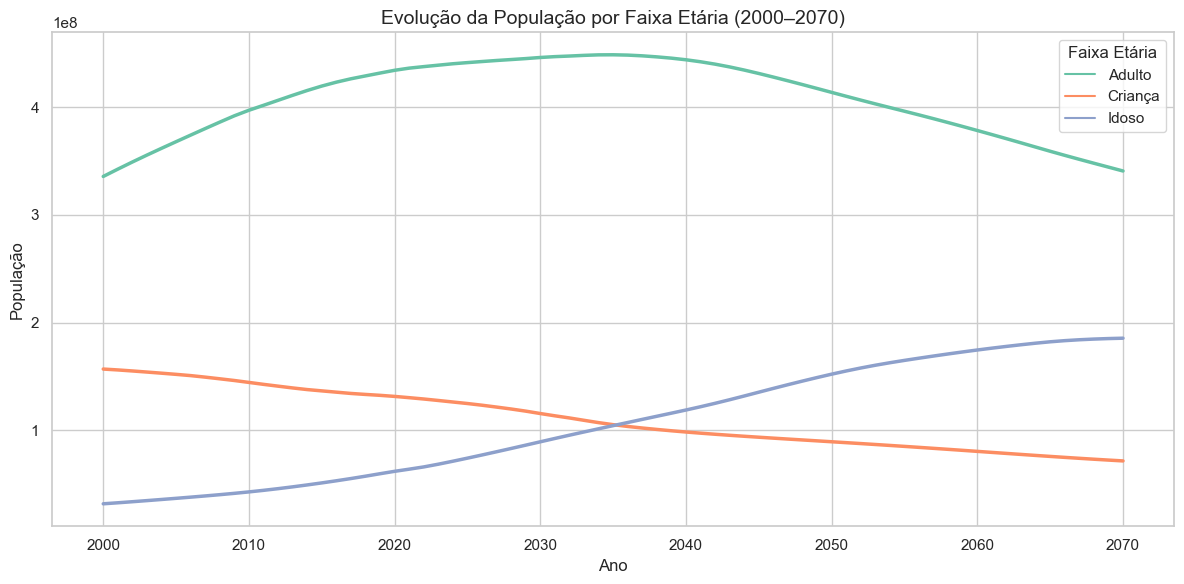

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtra apenas dados do sexo "Ambos"
df_total = df_agrupado[df_agrupado["SEXO"] == "Ambos"]

# Configura o estilo do gráfico
sns.set(style="whitegrid")

# Cria o gráfico de linha
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_total, x="ANO", y="POPULACAO", hue="FAIXA_ETARIA", palette="Set2", linewidth=2.5)

# Ajustes do gráfico
plt.title("Evolução da População por Faixa Etária (2000–2070)", fontsize=14)
plt.xlabel("Ano")
plt.ylabel("População")
plt.legend(title="Faixa Etária")
plt.tight_layout()
plt.show()


## 🧠 O que você vai observar:
* Linha crescente dos idosos

* Linha decrescente das crianças

* Após o crescimento, a população adulta inicia um processo de declínio, retornando a patamares semelhantes aos observados no início da série histórica.

📌 Fórmula do Índice de Envelhecimento:

 Índice de Envelhecimento = (População Idosa/ População Infantil) X 100
                             

In [10]:
# Já usamos df_total antes (com SEXO == "Ambos"), então podemos continuar com ele:
df_pivot = df_total.pivot(index="ANO", columns="FAIXA_ETARIA", values="POPULACAO").reset_index()

# Calcular o índice de envelhecimento
df_pivot["INDICE_ENVELHECIMENTO"] = (df_pivot["Idoso"] / df_pivot["Criança"]) * 100

# Visualizar
df_pivot[["ANO", "Criança", "Idoso", "INDICE_ENVELHECIMENTO"]].head()


FAIXA_ETARIA,ANO,Criança,Idoso,INDICE_ENVELHECIMENTO
0,2000,156779745,31581969,20.144164
1,2001,155956356,32524557,20.854910
2,2002,155006181,33517956,21.623625
3,2003,153989733,34544580,22.433041
4,2004,152942454,35594061,23.272845


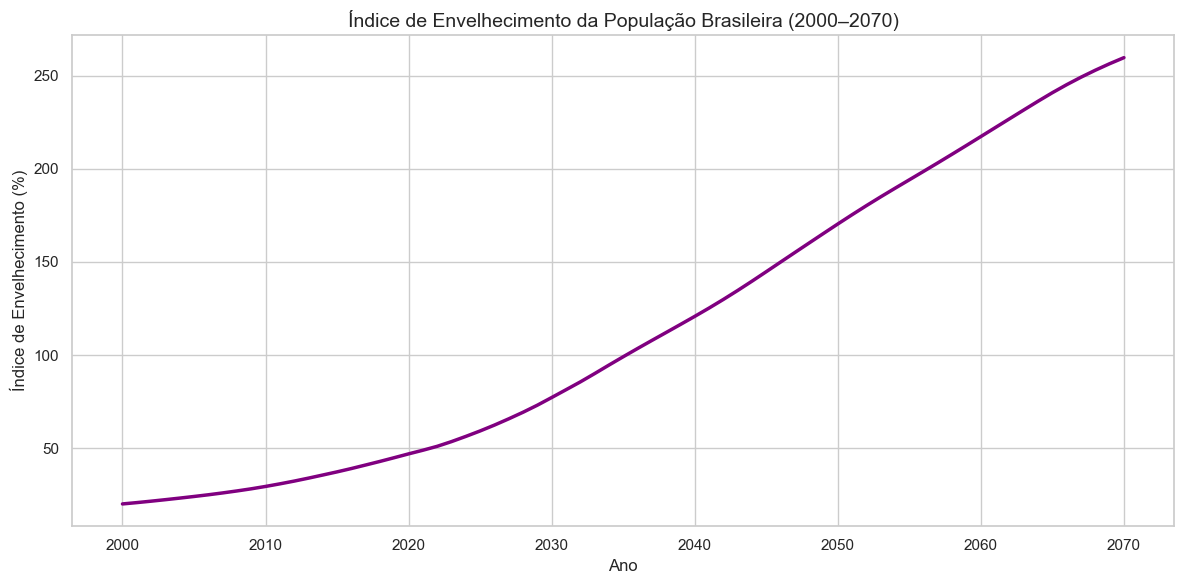

In [11]:
# Gráfico
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_pivot, x="ANO", y="INDICE_ENVELHECIMENTO", color="purple", linewidth=2.5)

plt.title("Índice de Envelhecimento da População Brasileira (2000–2070)", fontsize=14)
plt.xlabel("Ano")
plt.ylabel("Índice de Envelhecimento (%)")
plt.grid(True)
plt.tight_layout()
plt.show()


In [12]:
df_pivot[df_pivot["ANO"] == 2070][["Criança", "Idoso", "INDICE_ENVELHECIMENTO"]]


FAIXA_ETARIA,Criança,Idoso,INDICE_ENVELHECIMENTO
70,71425029,185450499,259.643575


 Em 2070, o Índice de Envelhecimento atinge 259,6%, indicando que haverá quase três vezes mais idosos do que crianças no Brasil. Esse dado representa uma mudança drástica no perfil demográfico do país, com implicações diretas para a economia, previdência, saúde e planejamento urbano.

### A Razão de Dependência mostra quantos dependentes (crianças + idosos) existem para cada 100 adultos.

Razão de Dependência = (criança + Idoso / Adulto) X 100 

In [13]:
# Cálculo da razão de dependência
df_pivot["RAZAO_DEPENDENCIA"] = ((df_pivot["Criança"] + df_pivot["Idoso"]) / df_pivot["Adulto"]) * 100

# Visualizar os dados
df_pivot[["ANO", "Criança", "Adulto", "Idoso", "RAZAO_DEPENDENCIA"]].head()


FAIXA_ETARIA,ANO,Criança,Adulto,Idoso,RAZAO_DEPENDENCIA
0,2000,156779745,335726091,31581969,56.105772
1,2001,155956356,342530316,32524557,55.026053
2,2002,155006181,349160625,33517956,53.993527
3,2003,153989733,355598649,34544580,53.018850
4,2004,152942454,361872264,35594061,52.100294


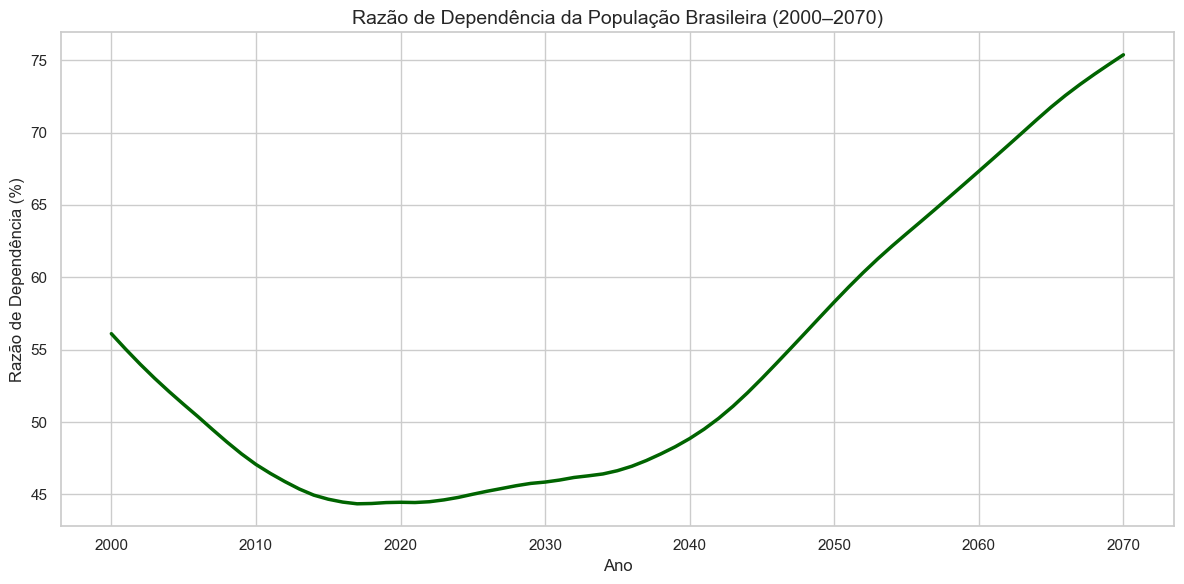

In [14]:
# Gráfico da razão de dependência
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_pivot, x="ANO", y="RAZAO_DEPENDENCIA", color="darkgreen", linewidth=2.5)

plt.title("Razão de Dependência da População Brasileira (2000–2070)", fontsize=14)
plt.xlabel("Ano")
plt.ylabel("Razão de Dependência (%)")
plt.grid(True)
plt.tight_layout()
plt.show()


###  Razão de Dependência no Brasil 
A Razão de Dependência no Brasil apresenta uma curva em formato de “U”: ela começa em um nível mais alto no ano 2000, atinge seu ponto mais baixo por volta de 2040 e volta a crescer até 2070. Essa mudança de direção no gráfico — chamada de ponto de inflexão — ocorre à medida que a população em idade produtiva começa a diminuir e a população idosa aumenta significativamente. A tendência indica uma crescente pressão sobre os adultos economicamente ativos, exigindo políticas públicas que reforcem a previdência, o sistema de saúde e o suporte familiar no país.

In [15]:
df_pivot[df_pivot["ANO"].isin([2000, 2040, 2070])][["ANO", "Criança", "Adulto", "Idoso", "RAZAO_DEPENDENCIA"]]


FAIXA_ETARIA,ANO,Criança,Adulto,Idoso,RAZAO_DEPENDENCIA
0,2000,156779745,335726091,31581969,56.105772
40,2040,98285913,444146343,118727064,48.860692
70,2070,71425029,340810596,185450499,75.371931


## Distribuição Populacional por Faixa Etária e Sexo – Anos 2000 e 2070

In [27]:
# Agrupar por FAIXA_ETARIA, SEXO e ANO
df_faixa = df_populacao[
    (df_populacao["LOCAL"] == "Brasil") & 
    (df_populacao["SEXO"].isin(["Homens", "Mulheres"])) & 
    (df_populacao["ANO"].isin([2000, 2070]))
]

df_agrupado = df_faixa.groupby(["ANO", "FAIXA_ETARIA", "SEXO"])["POPULACAO"].sum().reset_index()
df_agrupado

,ANO,FAIXA_ETARIA,SEXO,POPULACAO
0,2000,Adulto,Homens,54827057
1,2000,Adulto,Mulheres,57081640
2,2000,Criança,Homens,26250061
3,2000,Criança,Mulheres,26009854
4,2000,Idoso,Homens,4643588
5,2000,Idoso,Mulheres,5883735
6,2070,Adulto,Homens,57417099
7,2070,Adulto,Mulheres,56186433
8,2070,Criança,Homens,12188712
9,2070,Criança,Mulheres,11619631


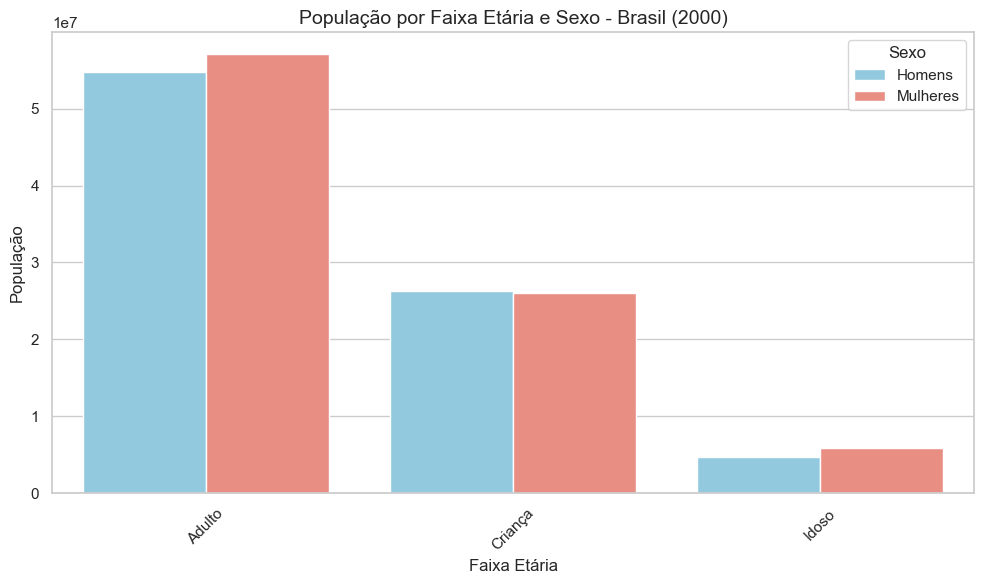

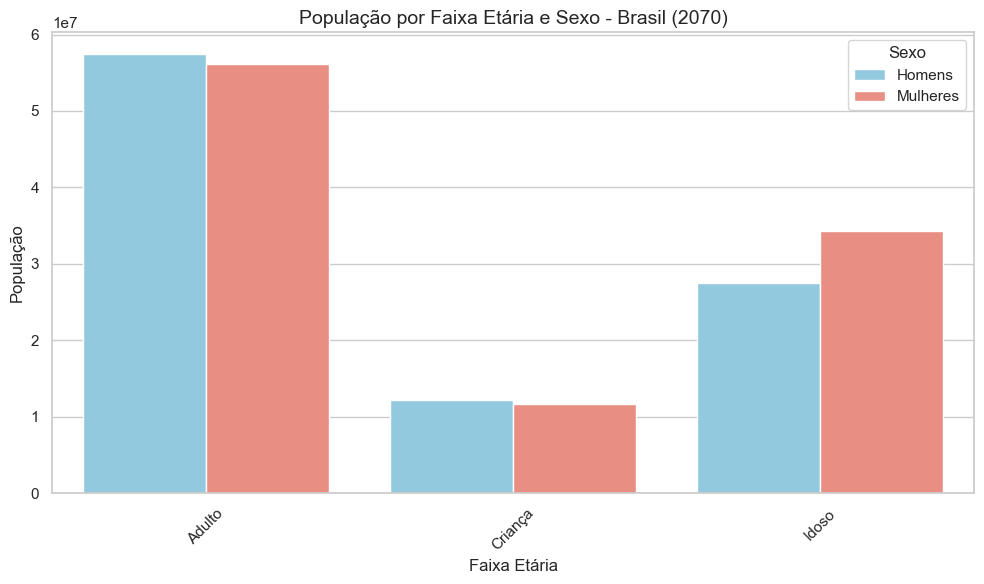

In [28]:
# Criar gráfico para cada ano
for ano in [2000, 2070]:
    df_ano = df_agrupado[df_agrupado["ANO"] == ano]

    plt.figure(figsize=(10, 6))
    sns.barplot(data=df_ano, x="FAIXA_ETARIA", y="POPULACAO", hue="SEXO", palette=["skyblue", "salmon"])

    plt.title(f"População por Faixa Etária e Sexo - Brasil ({ano})", fontsize=14)
    plt.xlabel("Faixa Etária")
    plt.ylabel("População")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.legend(title="Sexo")
    plt.show()


## Distribuição Populacional por Faixa Etária e Sexo – Anos 2000 e 2070

Distribuição Populacional por Faixa Etária e Sexo – Anos 2000 e 2070
Os gráficos de barras por faixa etária evidenciam com clareza as mudanças no perfil demográfico brasileiro ao longo de sete décadas. Em 2000, observa-se uma concentração significativa da população nas faixas infantis e adultas jovens, com equilíbrio entre homens e mulheres até cerca dos 60 anos. Em 2070, nota-se um deslocamento demográfico: as faixas etárias mais elevadas passam a representar uma parcela muito maior da população, especialmente entre as mulheres — reflexo de sua maior longevidade. A redução proporcional da população infantil e adulta jovem reforça a tendência de envelhecimento, exigindo atenção a políticas públicas voltadas à saúde, previdência, formação multiprofissional e suporte ao cuidado com os idosos.